In [8]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
Image(url='http://datascience.uci.edu/wp-content/uploads/sites/2/2014/09/data_science_logo_with_image1.png')

## Predictive Modeling with Python - Overfitting, Regularization, Model Selection
#### Author: Kevin Bache
#### Modified by: Preston Hinkle

## Before Lunch:
We created a linear model and saw that it performed well on already seen data but poorly on unseen data.


This session is about creating models that *generalize* to new data.

## Predictive Modeling


What we saw above is a common setup.  We have $\mathbf{X}$ and $\mathbf{y}$ data from the past and $\mathbf{X}$ data for the present for which we want to **predict** the future $\mathbf{y}$ values.

We can generalize this notion of past/present data into what's generally called *train* and *test* data.

* **Training Data** -- A dataset that we use to train our model.  We have both $\mathbf{X}$ and $\mathbf{y}$

* **Testing Data** -- A dataset that we test our model on to get an idea of how well our model will perform on new data. **Never optimize a model based on predictions of the testing set.**

## Two of machine learning's key ideas:
### <span style="color:green">**1) A predictive model is only as good as its predictions on unseen data **</span>

### <span style="color:green">**2) Error on the dataset we trained on is not a good predictor of error on future data**</span>

- Why? Because when we train models we tend to *over-fit* the training data set.

### Overfitting in One Picture

In [3]:
Image(url='http://radimrehurek.com/data_science_python/plot_bias_variance_examples_2.png')

### Model description:
- d = 1: Two parameters: $y = \theta_{0} + \theta_{1}x_{1}$ (intercept + linear term)
- d = 2: Three parameters: $y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}^{2}$ (intercept + linear term + quadratic term)
- d = 6: Seven parameters: $y = \theta_{0} + \theta_{1}x_{1} + ... + \theta_{6}x^{6}$ (intercept + linear term + ... ) a 6th degree polynomial!

### Questions:
- Which of the above 3 models has the least error?
- Which do you think is the best model?

## How to Fight Overfitting?

Obviously overfitting weakens our model's predictive power for new data, but how do we prevent it?

There are two linked strategies for to accomplish this: **regularization** and **model selection**.

## Regularization
The idea in regularization is that we're going to modify our loss function to penalize it for being too complex. Simple models tend to perform better on new data.

One way to do this is to try to keep our regression coefficients small. Why would we want to do this? One intuitive explanation is that if we have big regression coefficients we'll get large changes in the predicted values from small changes in input value. This led to the erratic behavior of the 6th degree polynomial fit to the data in the above plot. Intuitively, our predictions should vary smoothly with the data.

So a model with smaller coefficients makes smoother predictions.  It is simpler, which means it will have a harder time overfitting. 

We can change our linear regression loss function to help us reduce overfitting:

### Linear Regression Loss Function
\begin{eqnarray*}
    Loss(\beta) = MSE &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat y_i)^2 \\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 \\   
\end{eqnarray*}

### Linear Regression Loss Function __with Regularization__
\begin{eqnarray*}
    Loss(\beta) &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha ||\beta||_2^2\\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha \beta^T \beta\\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha \sum_{d=1}^D \beta_d^2\\
\end{eqnarray*}

**Important:** $\alpha$ is known as the regularization hyperparameter, and it determines how strongly we wish to penalize large parameter values $\beta$.

**By the way, there are many types of regularization that can be used; we chose something called 'Ridge Regression' which uses the L$^{2}$ norm (sum of squares).**

We won't get into details, but a ridge regression model can be optimized in much the same way as an unregularized linear regression: either with using some form of gradient descent or matrix-based solutions. 

### <span style="color:red">Understanding the effects of the regularization term</span>
1. Partner up.  On one computer:
  1. Create two linear models in scikitlearn, an unregularized `LinearRegression` model, and a regularized `Ridge` model with regularization parameter $\alpha$ = 1. e.g., `model_ridge = linear_model.Ridge(alpha = 1)`
  2. *Train* both models on the training data set loaded below, e.g., `model.fit(x_train, y_train)`
  3. *Predict* the output values $y$ for the training and test data set using both of the trained models, e.g., `model.predict(x)`
  4. Calculate the mean squared error of the predictions $y$ for the training and test sets using the function defined below
  5. For each model, sum the absolute values of the coefficients $\beta$
      - Hints:
          - `model.coef_` returns a list of the coefficients of `model`
          - `np.sum()` and `np.abs()` will help sum the coefficients

2. Inspect the training error, test error, and the sums of coefficients for the training and test models.
3. Discuss; what impact did the regularization term have on our model's determined coefficients and its performance?

In [5]:
from sklearn.linear_model import LinearRegression, Ridge

In [6]:
def mean_squared_error(y_true, y_pred):
    """
    calculate the mean_squared_error given a vector of true ys and a vector of predicted ys
    """
    diff = y_true - y_pred
    return np.dot(diff, diff) / len(diff)

In [9]:
# load overfitting data
with np.load('data/overfitting_data.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [13]:
#########################
# Solution
#########################


model_lr = linear_model.LinearRegression()
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)

print 'LinearRegression():'
print '\tMean-squared error', mean_squared_error(y_test, y_pred)
print '\tCoefficients:', np.sum(np.abs(model_lr.coef_))

model_ridge = linear_model.Ridge(alpha = 1)
model_ridge.fit(x_train, y_train)
y_pred = model_ridge.predict(x_test)

print 'Ridge(alpha = 1):'
print '\tMean-squared error', mean_squared_error(y_test, y_pred)
print '\tCoefficients:', np.sum(np.abs(model_ridge.coef_))

LinearRegression():
	Mean-squared error 283.527287922
	Coefficients: 338.387469048
Ridge(alpha = 1):
	Mean-squared error 9.56415606837
	Coefficients: 62.4912904062


### Regularization is awesome!

If the above steps were completed correctly, then you should have created and trained a *regularized* model that had less error on the test set than the *unregularized* model. Great job!

This method is clearly very powerful, but it raises some questions.

- How do we choose $\alpha$? Setting $\alpha=1$ improved upon the unregularized model, but the value was arbitrarily chosen---surely we can make do better.

- One option is to try a range of $\alpha$ values and select the one the yields the least error. But, remember: ** we are *not* allowed to optimize our model based on the test set!** This idea even extends to hyperparameters such as $\alpha$!

- So what do we do? We need a way of validating $\alpha$ choices, but we aren't allowed to use performance on the test data to make this decision...

- Solution: Partition the *training data* into two new sets, a new *training dataset* and a *validation dataset*, and use performance on the *validation* set to choose the best $\alpha$!

- Let's see what this looks like in action:


### <span style="color:red">Exercise: Choosing the optimal hyperparameter value $\alpha$ using a validation set</span>
1. Partner up. On one computer:
  1. Partition the training data set into a new training set and a validation set (this is done for you, just run the cell below)
  2. Train 12 models with regularization parameters $\alpha$ in {0, 1, 2, 4, 8, ..., 512, 1024}
  3. Calculate the training error, validation error, test error, and the magnitude of the coefficient vectors for each model. 
  4. **Store the values in lists named as follows:**
    - 'train_errors'
    - 'validation_errors'
    - 'test_errors'
    - 'coef_mags'
  5. Inspect the relationship between train error, validation error, test error, and coefficient magnitudes for each value of $\alpha$
    
- **Hints: **
    - We can train a non-regularized Linear Regression model using Ridge(alpha = 0)
    - Python lists are very helpful here
        - Create a `list` of all the alpha values, called alphas: `alphas=[0, 1, 2, ..., 1024]`
        - Create a `list` of models like so: `models=[linear_model.Ridge(alpha) for alpha in alphas]`
        - Iterate over every model in a `for` loop, calculating the errors and coefficients and appending them to the lists

In [15]:
# load overfitting data into 'train' and 'test' sets
with np.load('data/overfitting_data.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

# split the 'train' set into 'train' and 'validation' sets
from sklearn.cross_validation import train_test_split
validation_portion = 0.1
seed = 1234
x_train, x_valid, y_train, y_valid = \
    train_test_split(x_train, y_train, test_size=validation_portion, random_state=seed)

/home/preston/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
#########################
# Solution
#########################

alphas = [0]+[2**i for i in range(0,11)]

models = [linear_model.Ridge(alpha) for alpha in alphas]


train_errors = []
valid_errors = []
test_errors = []
coef_mags = []

for model in models:
    
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Predict the outputs y for the training, validation, and test data
    y_train_pred = model.predict(x_train)
    y_valid_pred = model.predict(x_valid)
    y_test_pred = model.predict(x_test)
    
    # Calculate the mean-squared error of each set of predictions, and append to the appropriate lists
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    valid_errors.append(mean_squared_error(y_valid, y_valid_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    # Calculate the norm of the coefficient vector and append to list
    coef_mags.append(np.sum(np.abs(model.coef_)))
    
print 'training errors:'
for i, model in enumerate(models):
    print 'alpha = ', alphas[i], '\t', round(train_errors[i],3)
    
print '\nvalidation errors:'
for i, model in enumerate(models):
    print 'alpha = ', alphas[i], '\t', round(valid_errors[i],3)
    
print '\ntest errors:'
for i, model in enumerate(models):
    print 'alpha = ', alphas[i], '\t', round(test_errors[i],3)
    
print '\ncoefficients:'
for i, model in enumerate(models):
    print 'alpha = ', alphas[i], '\t', round(coef_mags[i],3)

training errors:
alpha =  0 	0.0
alpha =  1 	0.002
alpha =  2 	0.005
alpha =  4 	0.012
alpha =  8 	0.029
alpha =  16 	0.063
alpha =  32 	0.137
alpha =  64 	0.291
alpha =  128 	0.619
alpha =  256 	1.282
alpha =  512 	2.502
alpha =  1024 	4.429

validation errors:
alpha =  0 	9.006
alpha =  1 	7.451
alpha =  2 	6.569
alpha =  4 	5.576
alpha =  8 	4.677
alpha =  16 	4.063
alpha =  32 	3.819
alpha =  64 	3.908
alpha =  128 	4.271
alpha =  256 	4.901
alpha =  512 	5.83
alpha =  1024 	7.04

test errors:
alpha =  0 	8.078
alpha =  1 	6.842
alpha =  2 	6.188
alpha =  4 	5.5
alpha =  8 	4.943
alpha =  16 	4.66
alpha =  32 	4.739
alpha =  64 	5.214
alpha =  128 	6.097
alpha =  256 	7.38
alpha =  512 	9.015
alpha =  1024 	10.865

coefficients:
alpha =  0 	62.913
alpha =  1 	57.752
alpha =  2 	54.657
alpha =  4 	50.843
alpha =  8 	46.667
alpha =  16 	42.76
alpha =  32 	39.288
alpha =  64 	36.05
alpha =  128 	32.777
alpha =  256 	28.731
alpha =  512 	23.802
alpha =  1024 	18.295


### Now, let's plot the results!
- *psst* did you put the values in lists with names as described above? Re-read the instructions above if the following doesn't evaluate!

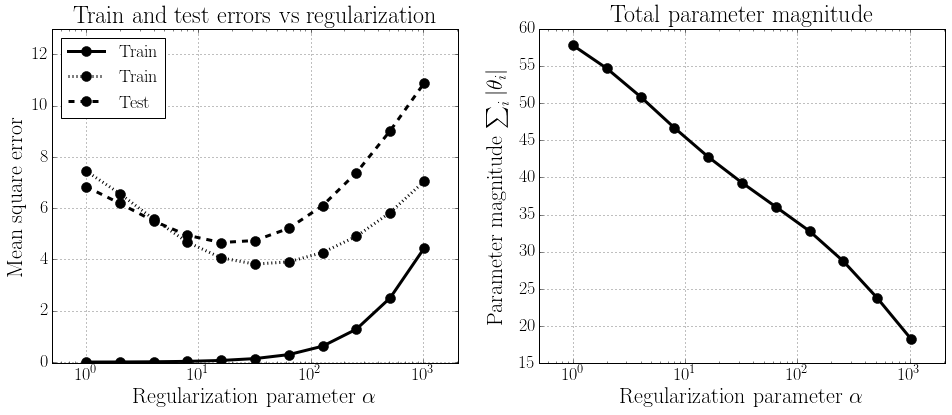

In [41]:
# Set up figure
fig, axes = plt.subplots(1, 2, figsize = (16,6))

# First plot
plt.sca(axes[0])

plt.semilogx(alphas[1:], train_errors[1:], lw = 3, label = 'Train', color = 'k', marker = 'o', markersize = 10)
plt.semilogx(alphas[1:], valid_errors[1:], lw = 3, label = 'Train', color = 'k', ls = ':', marker = 'o', markersize = 10)
plt.semilogx(alphas[1:], test_errors[1:], lw = 3, label = 'Test', color = 'k', ls = '--', marker = 'o', markersize = 10)

plt.xlim(.5, 2056)
plt.ylim(-.05,13)

plt.title('Train and test errors vs regularization', size = 24)
plt.xlabel(r'Regularization parameter $\alpha$', size = 22)
plt.ylabel(r'Mean square error', size = 22)

plt.legend(fontsize = 18, loc = 'upper left', numpoints=1)
plt.grid()
plt.tick_params(labelsize = 18)

# Second plot
plt.sca(axes[1])
plt.semilogx(alphas[1:], coef_mags[1:], lw = 3, color = 'k', marker = 'o', markersize = 10)
plt.xlim(.5, 2056)


plt.title('Total parameter magnitude', size = 24)
plt.xlabel(r'Regularization parameter $\alpha$', size = 22)
plt.ylabel(r'Parameter magnitude $\sum_{i}|\theta_{i}|$', size = 22)

plt.grid()
plt.tick_params(labelsize = 18)

# Show
plt.show()

### Discuss the above plots
- Some questions to think about:
    - What happens to the training error as we dial up $\alpha$?
    - The optimum value of $\alpha$ is given by the location of the minimum in the validation curve; are models to the left overfit or underfit? to the right?
    - How is the right plot explained in terms of the Ridge cost function?
$$Loss\left(\beta\right)=\frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 + \alpha \sum_{d=1}^D \beta_d^2$$

## Cross validation

- Using regularization with varying values of the *hyperparameter* $\alpha$ above gave us a good way of selecting which $\alpha$ to choose in our final model
- However, the mean squared test error from the best $\alpha$ is *still* not the best estimator of the error on new data!
- Why? We overfit our regularization parameter $\alpha$ to the validation set!
- Remember, we calculated the validation error for each $\alpha$ and choose the $\alpha$ which minimized that error; if the validation data had been *slightly* different, we might have chosen a different optimal value of $\alpha$
- Consider the following plot:

In [68]:
# load overfitting data into 'train' and 'test' sets
with np.load('data/overfitting_data.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

# split the 'train' set into 'train' and 'validation' sets
from sklearn.cross_validation import train_test_split
validation_portion = 0.1
seed_1 = 1234
seed_2 = 7890
x_train_1, x_valid_1, y_train_1, y_valid_1 = \
    train_test_split(x_train, y_train, test_size=validation_portion, random_state=seed_1)
x_train_2, x_valid_2, y_train_2, y_valid_2 = \
    train_test_split(x_train, y_train, test_size=validation_portion, random_state=seed_2)

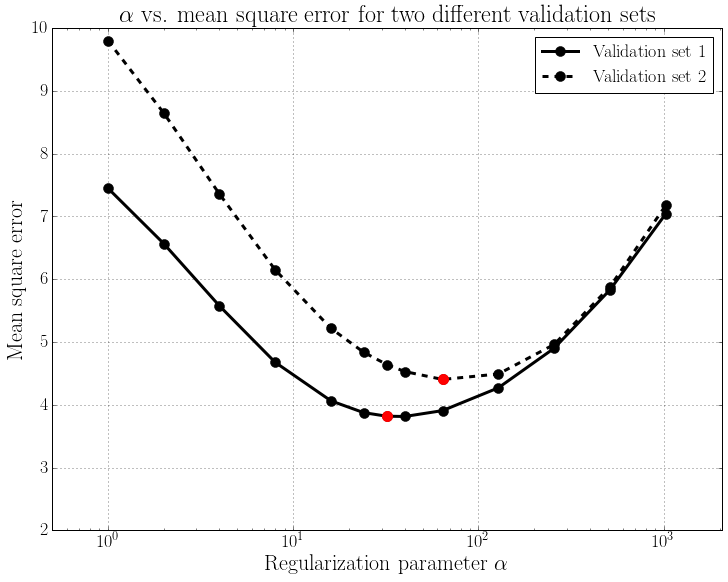

In [101]:
#########################
# Solution
#########################

alphas = sorted([0]+[2**i for i in range(0,11)]+[24, 40])



# Set up figure
fig, axes = plt.subplots(1, 1, figsize = (12,9))

lines = ['-', '--']

for j, (x_train, y_train, x_valid, y_valid) in enumerate([(x_train_1, y_train_1, x_valid_1, y_valid_1),
                                          (x_train_2, y_train_2, x_valid_2, y_valid_2)]):

    models = [linear_model.Ridge(alpha) for alpha in alphas]
    
    train_errors = []
    valid_errors = []
    test_errors = []
    coef_mags = []

    for model in models:
        
        # Fit the model to the training data
        model.fit(x_train, y_train)

        # Predict the outputs y for the training, validation, and test data
        y_train_pred = model.predict(x_train)
        y_valid_pred = model.predict(x_valid)
        #y_test_pred = model.predict(x_test)

        # Calculate the mean-squared error of each set of predictions, and append to the appropriate lists
        train_errors.append(mean_squared_error(y_train, y_train_pred))
        valid_errors.append(mean_squared_error(y_valid, y_valid_pred))
        #test_errors.append(mean_squared_error(y_test, y_test_pred))

        # Calculate the norm of the coefficient vector and append to list
        coef_mags.append(np.sum(np.abs(model.coef_)))

    



    #plt.semilogx(alphas[1:], train_errors[1:], lw = 3, label = 'Train', color = 'k', marker = 'o', markersize = 10)


    plt.semilogx(alphas[1:], valid_errors[1:], lw = 3, label = 'Validation set '+str(j+1), color = 'k', ls = lines[j], marker = 'o', markersize = 10)


plt.scatter(32, 3.82, color = 'red', s = 100, zorder = 3)
plt.scatter(64, 4.415, color = 'red', s = 100, zorder = 3)
    
plt.xlim(.5, 2056)
plt.ylim(2,10)

plt.title(r'$\alpha$ vs. mean square error for two different validation sets', size = 24)
plt.xlabel(r'Regularization parameter $\alpha$', size = 22)
plt.ylabel(r'Mean square error', size = 22)

plt.legend(fontsize = 18, loc = 'upper right', numpoints=1)
plt.grid()
plt.tick_params(labelsize = 18)

plt.savefig('alpha_variance.png')

plt.show()



In [ ]:
### Instructions:
- Perform the following 2 times, with three different sets of training and test data
- Train 5 models with regularization parameters $\alpha$ in {24, 28, 32, 36, 40}
- Calculate the training error, test error, and the magnitude of the coefficient vectors for each model
- Store the values in lists named:
    - 'train_errors'
    - 'test_errors'
    - 'coef_mags'
    
- **Hints: **
    - We can train a non-regularized Linear Regression model using Ridge(alpha = 0)
    - Python lists are very helpful here
        - Create a list of all the alpha values, called alphas
        - Create a list of models like so: `models=[linear_model.Ridge(alpha) for alpha in alphas]`
        - Then, iterate over every model in a for loop, calculating the errors and coefficients and appending them to lists like so        


In [9]:
from sklearn.cross_validation import train_test_split

/home/preston/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
# load overfitting data
with np.load('data/overfitting_data.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [12]:
print y.shape

(900,)


In [14]:
# Don't change this!
best_alphas = []


for i in range(2):
    print i
    alphas = [24, 28, 32, 36, 40]
    #seed = seeds[i]
    x_train, x_test, y_train, y_test = \
    train_test_split(x_train, y_train, test_size=0.1, random_state=int(1000*np.random.rand()))
    
    
    
    
    # Insert code here---create the models, train, and test them!
    models = [linear_model.Ridge(alpha) for alpha in alphas]



    train_errors.append([])
    test_errors.append([])
    coef_mags.append([])

    for model in models:
        train_error, test_error = calc_train_and_test_error(model, x_train, y_train, x_test, y_test)
        train_errors[i].append(train_error)
        test_errors[i].append(test_error)
        coef_mags[i].append(np.sum(np.abs(model.coef_)))

    best_alphas.append(alphas[np.argmin(test_errors)])
        
    #print 'best alpha', alphas[np.argmin(test_errors)]
    #print 'test error', test_errors[np.argmin(test_errors)]
    

0


AttributeError: 'numpy.float64' object has no attribute 'append'

In [ ]:
# Set up figure
fig, axes = plt.subplots(1, 2, figsize = (16,6))

# First plot
plt.sca(axes[0])

plt.semilogx(alphas[1:], train_errors[0][1:], lw = 3, label = 'Train', color = 'k', marker = 'o', markersize = 10)
plt.semilogx(alphas[1:], test_errors[0][1:], lw = 3, label = 'Test', color = 'k', ls = '--', marker = 'o', markersize = 10)

plt.semilogx(alphas[1:], train_errors[1][1:], lw = 3, label = 'Train', color = 'gray', marker = 'o', markersize = 10)
plt.semilogx(alphas[1:], test_errors[1][1:], lw = 3, label = 'Test', color = 'gray', ls = '--', marker = 'o', markersize = 10)

plt.xlim(.5, 2056)
plt.ylim(-.05,13)

plt.title('Train and test errors vs regularization', size = 24)
plt.xlabel(r'Regularization parameter $\alpha$', size = 22)
plt.ylabel(r'Mean square error', size = 22)

plt.legend(fontsize = 18, loc = 'upper left')
plt.grid()
plt.tick_params(labelsize = 18)

# Second plot
plt.sca(axes[1])
plt.semilogx(alphas[1:], coef_mags[0][1:], lw = 3, color = 'k', marker = 'o', markersize = 10)
plt.xlim(.5, 2056)
plt.semilogx(alphas[1:], coef_mags[1][1:], lw = 3, color = 'gray', marker = 'o', markersize = 10)
plt.xlim(.5, 2056)


plt.title('Total parameter magnitude', size = 24)
plt.xlabel(r'Regularization parameter $\alpha$', size = 22)
plt.ylabel(r'Parameter magnitude $\sum_{i}|\theta_{i}|$', size = 22)

plt.grid()
plt.tick_params(labelsize = 18)

# Show
plt.show()

In [ ]:
print best_alphas

### How do we fix this?

- Create *another* data partition, this time called the **validation set**
- In total we partition our original data into **training, validation, and test** sets
1. Train a regularized model on the training data
2. Test the trained model on the validation set; select the model with lowest $\alpha$
3. Calculate the error on the test data; this is our final prediction for how well our model performs on new data

#### <span style="color:red">Validation Set Cross Validation Exercise</span>
1. Partner up.  On one computer:
  1. Write a function with the call signature `validation_set_error(model, x_train, y_train, validation_portion=0.1, seed=1234)` which returns the validation set estimate of the future error for the given `model`. This function should:
    1. Split the data into a reduced training set and a validation set
    1. Train on the reduced training set
    1. Estimate the mean squared error on the validation set
    1. Return that estimate
  1. Use your `calc_train_and_test_error(model, x_train, y_train, x_test, y_test)` function to calculate training and test set errors for these 
  1. Use this your `validation_set_error` function to estimate the future error on the overfitting data for:
    1. A linear regression model
    1. A ridge regression models with `alpha` = 10
  1. Do this for multiple random seeds
  1. Does validation error do a good job of predicting test error?
  1. If you have time: How does changing the validation_portion affect the similarity between the validation and test error?


In [ ]:
# a helper function for performing validation set cross validation
from sklearn.cross_validation import train_test_split
validation_portion = 0.1
seed = 1234
x_train_small, x_valid, y_train_small, y_valid = \
    train_test_split(x_train, y_train, test_size=validation_portion, random_state=seed)

print 'Original Training Set Size:'
print x_train.shape, y_train.shape
print

print 'Reducted Training Set Size:'
print x_train_small.shape, y_train_small.shape
print

print 'Validation Set Size:'
print x_valid.shape, y_valid.shape
print


In [ ]:
def validation_set_error(model, x_train, y_train, validation_portion=0.1, seed=1234):
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME

    x_train_small, x_valid, y_train_small, y_valid = \
        train_test_split(x_train, y_train, test_size=validation_portion, random_state=seed)
    model.fit(x_train_small, y_train_small)
    y_pred_valid = model.predict(x_valid)
    return mean_squared_error(y_valid, y_pred_valid)
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    
# set up models
model_lr_valid = linear_model.LinearRegression()
model_ridge_valid = linear_model.Ridge(alpha=10)

# calculate errors
valid_portion = .1
n_seeds = 5
print "Linear Regression Training and Test Errors:"
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
print calc_train_and_test_error(model_lr_valid, x_train, y_train, x_test, y_test)
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME

print
print "Linear Regression Validation Errors:"
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
for seed in range(n_seeds):
    print validation_set_error(model_lr_valid, x_train, y_train, validation_portion=valid_portion, seed=seed)
    print
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME

print "Ridge Regression Training and Test Errors:"
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
print calc_train_and_test_error(model_ridge_valid, x_train, y_train, x_test, y_test)
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME

print
print "Ridge Regression Validation Errors:"
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
for seed in range(n_seeds):
    print validation_set_error(model_ridge_valid, x_train, y_train, validation_portion=valid_portion, seed=seed)
    print
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME

### K-Fold Cross Validation
K-Fold cross validation is another cross validation method for estimating the out-of-sample error of a model.  It works like this:

1. Partition the training data into K folds
2. For each fold k in 1 to K:
  1. Train the model on all your data except the data in fold k
  2. Record the error on the the data in fold k
3. Estimate future error as average error across all folds

In [ ]:
Image(url='https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png')

* **Good:** Only wastes 100/k% of the data at a time
* **Bad:** Takes k times long as just training one model, still wastes 100/k% of the data

In [ ]:
# scikit learn provides a useful object to help you perform kfold cross validation
from sklearn.cross_validation import KFold

n_data = len(y_train)
fold_count = 0
for train_reduced_row_ids, valid_row_ids in KFold(n_data, n_folds=4):
    print
    print 
    print "FOLD %d:" % fold_count
    print "-------"
    print("train_ids:\n%s\n\nvalid_ids\n%s" % (train_reduced_row_ids, valid_row_ids))
    x_train_reduced = x_train[train_reduced_row_ids]
    y_train_reduced = y_train[train_reduced_row_ids]
    x_valid = x_train[valid_row_ids]
    y_valid = y_train[valid_row_ids]
    fold_count += 1

In [ ]:
# NOTE: KFolds isn't random at all.  It's important to shuffle your data first before using it. 
from sklearn.utils import shuffle
x_train_shuffled, y_train_shuffled = shuffle(x_train, y_train)

#### <span style="color:red">K-Fold Cross Validation Exercise</span>
1. Partner up.  On one computer:
  1. Write a function with the call signature `kfold_error(model, x_train, y_train, k=4, seed=1234)` which returns the k-fold cross validation estimate of the future error for the given `model`. This function should:
    1. Shuffle the training data set (both $\mathbf{x}$ and  $\mathbf{y}$ in unison)
    1. For each fold:
        1. Split the data into a reduced training set and a validation set
        1. Train on the reduced training set
        1. Estimate the mean squared error on the validation set
        1. Add the estimated error to a running sum of the estimated total error
    1. Return the average error across folds: i.e.: the estimated total error divided by the number of folds
  1. Use your `calc_train_and_test_error(model, x_train, y_train, x_test, y_test)` function to calculate training and test set errors for these 
  1. Use your `kfold_error` function with k=5 to estimate the future error on the overfitting data for:
    1. A linear regression model
    1. A ridge regression models with `alpha` = 10
  1. Do this for multiple random seeds
  1. Does k-fold error do a good job of predicting test error?

In [ ]:
def kfold_error(model, x_train, y_train, k=4, seed=1234):
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME

    # shuffle training data
    x_train_shuffled, y_train_shuffled = shuffle(x_train, y_train, random_state=seed)

    total_error = 0
    
    n_data = len(y_train)
    for train_reduced_row_ids, valid_row_ids in KFold(n_data, n_folds=k):
        x_train_reduced = x_train_shuffled[train_reduced_row_ids]
        y_train_reduced = y_train_shuffled[train_reduced_row_ids]
        x_valid = x_train_shuffled[valid_row_ids]
        y_valid = y_train_shuffled[valid_row_ids]
    
        model.fit(x_train_reduced, y_train_reduced)
        y_pred_valid = model.predict(x_valid)
        total_error += mean_squared_error(y_valid, y_pred_valid)

    return total_error / k
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME
    ########## TODO REMOVE ME   
    
# set up models
model_lr_valid = linear_model.LinearRegression()
model_ridge_valid = linear_model.Ridge(alpha=10)

# calculate errors
n_seeds = 3
k = 5

print "Linear Regression Training and Test Errors:"
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
print calc_train_and_test_error(model_lr_valid, x_train, y_train, x_test, y_test)
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME

print
print "Linear Regression K-Fold Errors:"
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
for seed in range(n_seeds):
    print kfold_error(model_lr_valid, x_train, y_train, k=k, seed=seed)
    print
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME

print
print "Ridge Regression Training and Test Errors:"
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
print calc_train_and_test_error(model_ridge_valid, x_train, y_train, x_test, y_test)
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME

print
print "Ridge Regression K-Fold Errors:"
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
for seed in range(n_seeds):
    print kfold_error(model_ridge_valid, x_train, y_train, k=k, seed=seed)
    print    
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME
########## TODO REMOVE ME

## Putting It All Together: Model and Hyperparameter Selection with Cross Validation
1. For each model and hyperparameter combo you're willing to consider:
  1. Estimate the model's performance on future data using cross validation
2. Pick the model with the best estimated future performance
3. Train the best model from scratch on the full dataset.  This is your final model

In [ ]:
def model_name(model):
    s = model.__str__().lower()
    if "linearregression" in s:
        return 'LinearRegression'
    elif "lasso" in s:
        return 'Lasso(a=%g)' % model.alpha
    elif "ridge" in s:
        return 'Ridge(a=%g)' % model.alpha
    elif "elastic" in s:
        return 'ElasticNet(a=%g, r=%g)' % (model.alpha, model.l1_ratio)
    else:
        raise ValueError("Unknown Model Type")

def create_models(alphas=(.01, .03, .1, .3, 1, 3), l1_ratios=(.7, .5, .3)):
    models = [linear_model.LinearRegression()]
    models.extend([linear_model.Ridge(a) for a in alphas])
    models.extend([linear_model.Lasso(a) for a in alphas])
    models.extend([linear_model.ElasticNet(a, l1_ratio=l) for a in alphas for l in l1_ratios])
    return models

def results_df(models, betas_true, x_train, y_train, x_test, y_test, k=4):
    n_data, n_dim = x_train.shape

    n_zeros = n_dim - len(betas_true)
    
    betas_true = np.concatenate([betas_true, np.zeros(n_zeros)])
    
    # fit models to training data
    [m.fit(x_train, y_train) for m in models]
    
    betas = np.vstack([betas_true] + [m.coef_ for m in models])
    beta_names = ['Beta ' + str(i) for i in range(n_dim)]

    # set up model names
    model_names =  ["True Coefs"] + [model_name(m) for m in models]
    df = pd.DataFrame(data=betas, columns=beta_names, index=model_names)

    # calculate training errors
    y_preds = [m.predict(x_train) for m in models]
    errors = [np.nan] + [mean_squared_error(y_train, y_pred) for y_pred in y_preds]
    df['Train Error'] = errors

    # calculate validation errors
    errors = [np.nan] + [kfold_error(m, x_train, y_train, k=k) for m in models]
    df['Cross Validation Error'] = errors

    # calculate test errors
    y_preds = [m.predict(x_test) for m in models]
    errors = [np.nan] + [mean_squared_error(y_test, y_pred) for y_pred in y_preds]
    df['Test Error'] = errors

    return df


# these are some of the magic parameters that I used to actually 
# generate the overfitting dataset
n_dim = 598
n_dim_meaningful = 3
n_dim_disp_extra = 2

# the actual betas used to generate the y values.  the rest were 0.
betas_true = np.arange(n_dim_meaningful) + 1

# create a whole bunch of untrained models
models = create_models(alphas=(.01, .03, .1, .3, 1), l1_ratios=(.9, .7, .5))

# 
all_results = results_df(models, betas_true, x_train, y_train, x_test, y_test, k=4)

# decide which columns we want to display
disp_cols = ["Beta " + str(i) for i in range(n_dim_meaningful + n_dim_disp_extra)] 
disp_cols += ['Train Error', 'Cross Validation Error', 'Test Error']

# display the results
all_results[disp_cols]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure()
plt.scatter(all_results['Cross Validation Error'], all_results['Test Error'])
plt.xlabel('Cross Validation Error')
plt.ylabel('Test Error')
f.set_size_inches(8, 8)
plt.show()

In [ ]:
# scikit learn includes some functions for making cross validation easier 
# and computationally faster for a some models
from sklearn import linear_model
model_ridge_cv = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
model_lasso_cv = linear_model.LassoCV(alphas=[0.1, 1.0, 10.0])
model_en_cv = linear_model.ElasticNetCV(l1_ratio=[.9], n_alphas=100)

## Caveats:
* You can still overfit with intensive cross validation based model selection!
* But it's much better than without

## Summary:
* **The Central Theses of Machine Learning:** 
  * We're only interested in predictive performance on unseen data, not on seen data.
  * **Training error** estimates error on **seen** data
  * **Cross validation error** estimates error on **unseen** data
* **Regularization** strategies change how to train a model so that it will perform better on unseen data
* We talked about three forms of regularization for linear regression:
  * **Ridge Regression** (L2 Penalty)
  * **LASSO** (L1 Penalty)
  * **ElasticNet** (L1 + L2 Penalties)
* We talked about two kinds of cross validation error:
  * **Validation Error** -- split your training set into a reduced training set and a validation set
  * **K-Fold Error** -- Split your training data into k reduced training sets and a validation sets
* Regularization introduces new hyperparameters
* Use a cross validated estimate of future performance to choose your model and hyperparameter settings